In [26]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh80/inc90/BHOSS_CODE"
data = "Rh80_Rl1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_336.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9253.551623 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.500000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 1.06048e-35 0.00172149
Total flux = 2.117420 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9994.973143 Rg/c, inclination: 70.000000 deg, phi: 0.000000 deg, BH spin: 0.500000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 8.89303e-16 0.00136536
Total flux = 2.116031 Jy at 230 GHz
135:26:46.287 - Start Program


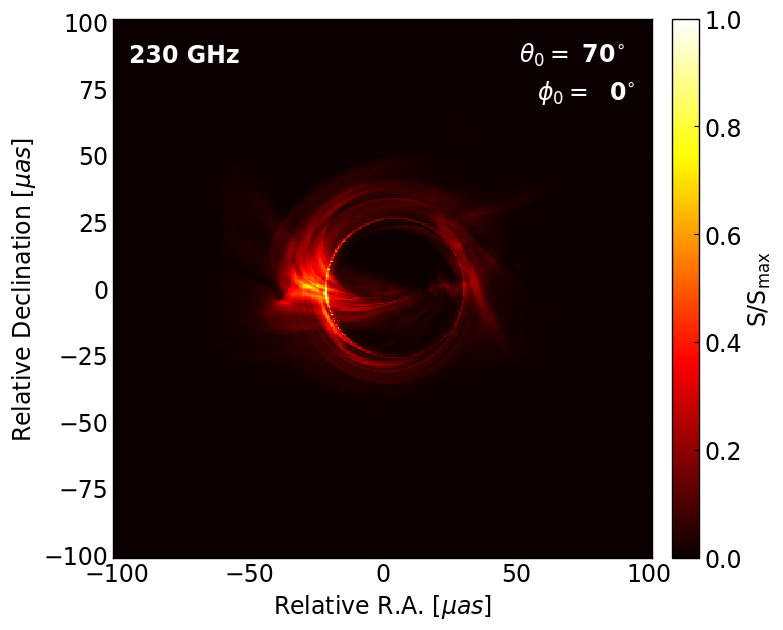

In [13]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [27]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10) | (Rhigh==20) | (Rhigh==40) | (Rhigh==80) | (Rhigh==160)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [28]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 10, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh80/inc10/BHOSS_CODE
311, flux: 2.464734 at 9003.597816
312, flux: 2.439790 at 9013.664967
313, flux: 2.451804 at 9023.730951
314, flux: 2.460562 at 9033.794470
315, flux: 2.495812 at 9043.862656
316, flux: 2.428963 at 9053.929463
317, flux: 2.325806 at 9063.995875
318, flux: 2.262447 at 9074.060236
319, flux: 2.247157 at 9084.125014
320, flux: 2.249280 at 9094.191161
321, flux: 2.326639 at 9104.258463
322, flux: 2.309946 at 9114.324296
323, flux: 2.306834 at 9124.388087
324, flux: 2.285638 at 9134.450798
325, flux: 2.261014 at 9144.515488
326, flux: 2.272711 at 9154.580838
327, flux: 2.324925 at 9164.643343
328, flux: 2.327893 at 9174.708090
329, flux: 2.296444 at 9184.774596
330, flux: 2.269646 at 9194.841238
331, flux: 2.246556 at 9204.906551
332, flux: 2.206663 at 9214.968879
333, flux: 2.127986 at 9225.032659
334, flux: 2.104480 at 9235.096933
335, flux: 2.088681 at 9243.486122
336, flux: 2.003444 at 9253.551623
337, 

In [29]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh80/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [30]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh80/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 1.995997 Jy, the density scale = 2.510000e-18


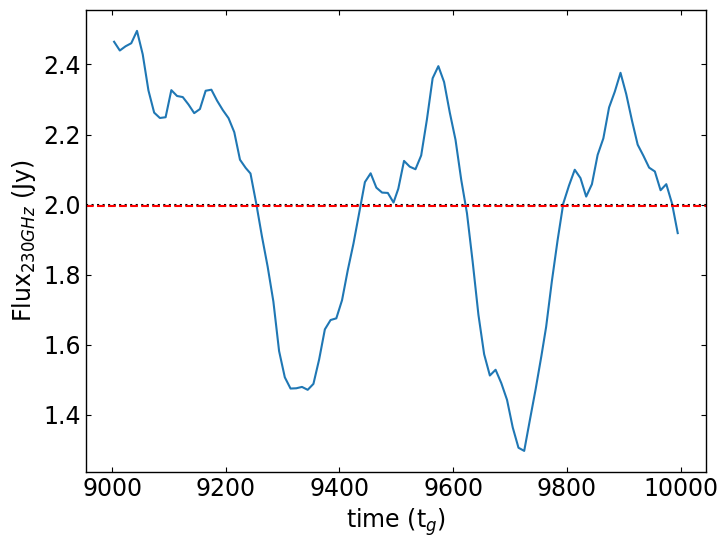

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [32]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.464734 Jy at 9003.597816
312:: 2.439790 Jy at 9013.664967
313:: 2.451804 Jy at 9023.730951
314:: 2.460562 Jy at 9033.794470
315:: 2.495812 Jy at 9043.862656
316:: 2.428963 Jy at 9053.929463
317:: 2.325806 Jy at 9063.995875
318:: 2.262447 Jy at 9074.060236
319:: 2.247157 Jy at 9084.125014
320:: 2.249280 Jy at 9094.191161
321:: 2.326639 Jy at 9104.258463
322:: 2.309946 Jy at 9114.324296
323:: 2.306834 Jy at 9124.388087
324:: 2.285638 Jy at 9134.450798
325:: 2.261014 Jy at 9144.515488
326:: 2.272711 Jy at 9154.580838
327:: 2.324925 Jy at 9164.643343
328:: 2.327893 Jy at 9174.708090
329:: 2.296444 Jy at 9184.774596
330:: 2.269646 Jy at 9194.841238
331:: 2.246556 Jy at 9204.906551
332:: 2.206663 Jy at 9214.968879
333:: 2.127986 Jy at 9225.032659
334:: 2.104480 Jy at 9235.096933
335:: 2.088681 Jy at 9243.486122
336:: 2.003444 Jy at 9253.551623
337:: 1.909298 Jy at 9263.615142
338:: 1.822797 Jy at 9273.678488
339:: 1.723285 Jy at 9283.741347
340:: 1.581681 Jy at 9293.805262
341:: 1.50

In [33]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 30, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh80/inc30/BHOSS_CODE
311, flux: 2.370627 at 9003.597816
312, flux: 2.335076 at 9013.664967
313, flux: 2.333227 at 9023.730951
314, flux: 2.322117 at 9033.794470
315, flux: 2.314755 at 9043.862656
316, flux: 2.212992 at 9053.929463
317, flux: 2.085297 at 9063.995875
318, flux: 2.023952 at 9074.060236
319, flux: 2.001297 at 9084.125014
320, flux: 2.024497 at 9094.191161
321, flux: 2.108050 at 9104.258463
322, flux: 2.099308 at 9114.324296
323, flux: 2.131563 at 9124.388087
324, flux: 2.137755 at 9134.450798
325, flux: 2.129633 at 9144.515488
326, flux: 2.160423 at 9154.580838
327, flux: 2.232605 at 9164.643343
328, flux: 2.252521 at 9174.708090
329, flux: 2.238012 at 9184.774596
330, flux: 2.220786 at 9194.841238
331, flux: 2.211615 at 9204.906551
332, flux: 2.175628 at 9214.968879
333, flux: 2.113060 at 9225.032659
334, flux: 2.120012 at 9235.096933
335, flux: 2.131017 at 9243.486122
336, flux: 2.058405 at 9253.551623
337, 

In [34]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh80/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [35]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh80/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 1.987129 Jy, the density scale = 2.450000e-18


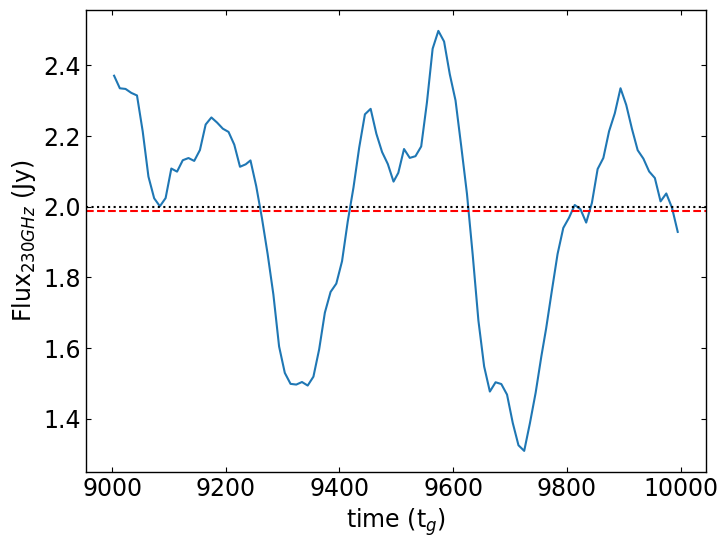

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [37]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.370627 Jy at 9003.597816
312:: 2.335076 Jy at 9013.664967
313:: 2.333227 Jy at 9023.730951
314:: 2.322117 Jy at 9033.794470
315:: 2.314755 Jy at 9043.862656
316:: 2.212992 Jy at 9053.929463
317:: 2.085297 Jy at 9063.995875
318:: 2.023952 Jy at 9074.060236
319:: 2.001297 Jy at 9084.125014
320:: 2.024497 Jy at 9094.191161
321:: 2.108050 Jy at 9104.258463
322:: 2.099308 Jy at 9114.324296
323:: 2.131563 Jy at 9124.388087
324:: 2.137755 Jy at 9134.450798
325:: 2.129633 Jy at 9144.515488
326:: 2.160423 Jy at 9154.580838
327:: 2.232605 Jy at 9164.643343
328:: 2.252521 Jy at 9174.708090
329:: 2.238012 Jy at 9184.774596
330:: 2.220786 Jy at 9194.841238
331:: 2.211615 Jy at 9204.906551
332:: 2.175628 Jy at 9214.968879
333:: 2.113060 Jy at 9225.032659
334:: 2.120012 Jy at 9235.096933
335:: 2.131017 Jy at 9243.486122
336:: 2.058405 Jy at 9253.551623
337:: 1.967924 Jy at 9263.615142
338:: 1.866002 Jy at 9273.678488
339:: 1.751926 Jy at 9283.741347
340:: 1.604721 Jy at 9293.805262
341:: 1.52

In [38]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 50, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh80/inc50/BHOSS_CODE
311, flux: 2.174696 at 9003.597816
312, flux: 2.147483 at 9013.664967
313, flux: 2.156906 at 9023.730951
314, flux: 2.161875 at 9033.794470
315, flux: 2.106361 at 9043.862656
316, flux: 1.980525 at 9053.929463
317, flux: 1.839160 at 9063.995875
318, flux: 1.789811 at 9074.060236
319, flux: 1.783561 at 9084.125014
320, flux: 1.836456 at 9094.191161
321, flux: 1.925422 at 9104.258463
322, flux: 1.931632 at 9114.324296
323, flux: 1.993935 at 9124.388087
324, flux: 2.025880 at 9134.450798
325, flux: 2.024016 at 9144.515488
326, flux: 2.041108 at 9154.580838
327, flux: 2.118434 at 9164.643343
328, flux: 2.151816 at 9174.708090
329, flux: 2.135575 at 9184.774596
330, flux: 2.133291 at 9194.841238
331, flux: 2.123133 at 9204.906551
332, flux: 2.085482 at 9214.968879
333, flux: 2.028155 at 9225.032659
334, flux: 2.056042 at 9235.096933
335, flux: 2.092528 at 9243.486122
336, flux: 2.022500 at 9253.551623
337, 

In [39]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh80/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [40]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh80/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 1.915554 Jy, the density scale = 2.270000e-18


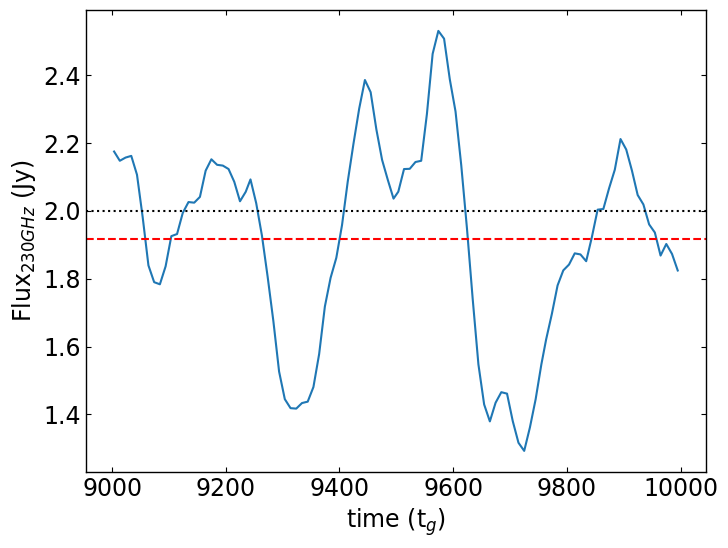

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [42]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.174696 Jy at 9003.597816
312:: 2.147483 Jy at 9013.664967
313:: 2.156906 Jy at 9023.730951
314:: 2.161875 Jy at 9033.794470
315:: 2.106361 Jy at 9043.862656
316:: 1.980525 Jy at 9053.929463
317:: 1.839160 Jy at 9063.995875
318:: 1.789811 Jy at 9074.060236
319:: 1.783561 Jy at 9084.125014
320:: 1.836456 Jy at 9094.191161
321:: 1.925422 Jy at 9104.258463
322:: 1.931632 Jy at 9114.324296
323:: 1.993935 Jy at 9124.388087
324:: 2.025880 Jy at 9134.450798
325:: 2.024016 Jy at 9144.515488
326:: 2.041108 Jy at 9154.580838
327:: 2.118434 Jy at 9164.643343
328:: 2.151816 Jy at 9174.708090
329:: 2.135575 Jy at 9184.774596
330:: 2.133291 Jy at 9194.841238
331:: 2.123133 Jy at 9204.906551
332:: 2.085482 Jy at 9214.968879
333:: 2.028155 Jy at 9225.032659
334:: 2.056042 Jy at 9235.096933
335:: 2.092528 Jy at 9243.486122
336:: 2.022500 Jy at 9253.551623
337:: 1.927142 Jy at 9263.615142
338:: 1.805643 Jy at 9273.678488
339:: 1.675047 Jy at 9283.741347
340:: 1.526458 Jy at 9293.805262
341:: 1.44

In [43]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 70, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh80/inc70/BHOSS_CODE
311, flux: 2.144438 at 9003.597816
312, flux: 2.145268 at 9013.664967
313, flux: 2.147198 at 9023.730951
314, flux: 2.166741 at 9033.794470
315, flux: 2.086991 at 9043.862656
316, flux: 1.942911 at 9053.929463
317, flux: 1.791905 at 9063.995875
318, flux: 1.756431 at 9074.060236
319, flux: 1.767943 at 9084.125014
320, flux: 1.863197 at 9094.191161
321, flux: 2.006974 at 9104.258463
322, flux: 2.026394 at 9114.324296
323, flux: 2.113250 at 9124.388087
324, flux: 2.204359 at 9134.450798
325, flux: 2.206040 at 9144.515488
326, flux: 2.146625 at 9154.580838
327, flux: 2.228032 at 9164.643343
328, flux: 2.233668 at 9174.708090
329, flux: 2.231620 at 9184.774596
330, flux: 2.262846 at 9194.841238
331, flux: 2.230911 at 9204.906551
332, flux: 2.159762 at 9214.968879
333, flux: 2.085984 at 9225.032659
334, flux: 2.138350 at 9235.096933
335, flux: 2.174275 at 9243.486122
336, flux: 2.077146 at 9253.551623
337, 

In [44]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh80/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [45]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh80/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 1.981331 Jy, the density scale = 2.140000e-18


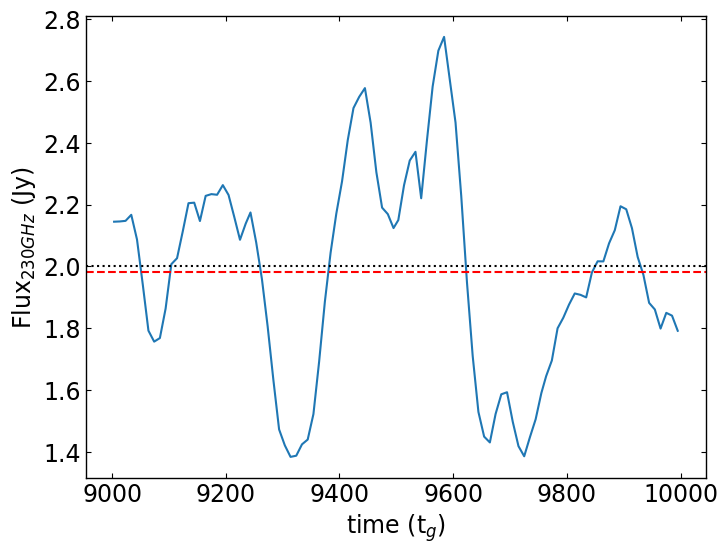

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [47]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.144438 Jy at 9003.597816
312:: 2.145268 Jy at 9013.664967
313:: 2.147198 Jy at 9023.730951
314:: 2.166741 Jy at 9033.794470
315:: 2.086991 Jy at 9043.862656
316:: 1.942911 Jy at 9053.929463
317:: 1.791905 Jy at 9063.995875
318:: 1.756431 Jy at 9074.060236
319:: 1.767943 Jy at 9084.125014
320:: 1.863197 Jy at 9094.191161
321:: 2.006974 Jy at 9104.258463
322:: 2.026394 Jy at 9114.324296
323:: 2.113250 Jy at 9124.388087
324:: 2.204359 Jy at 9134.450798
325:: 2.206040 Jy at 9144.515488
326:: 2.146625 Jy at 9154.580838
327:: 2.228032 Jy at 9164.643343
328:: 2.233668 Jy at 9174.708090
329:: 2.231620 Jy at 9184.774596
330:: 2.262846 Jy at 9194.841238
331:: 2.230911 Jy at 9204.906551
332:: 2.159762 Jy at 9214.968879
333:: 2.085984 Jy at 9225.032659
334:: 2.138350 Jy at 9235.096933
335:: 2.174275 Jy at 9243.486122
336:: 2.077146 Jy at 9253.551623
337:: 1.958927 Jy at 9263.615142
338:: 1.805638 Jy at 9273.678488
339:: 1.632734 Jy at 9283.741347
340:: 1.472466 Jy at 9293.805262
341:: 1.42

In [48]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 90, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh80/inc90/BHOSS_CODE
311, flux: 2.053368 at 9003.597816
312, flux: 2.069852 at 9013.664967
313, flux: 2.126924 at 9023.730951
314, flux: 2.135337 at 9033.794470
315, flux: 2.046487 at 9043.862656
316, flux: 1.840915 at 9053.929463
317, flux: 1.641085 at 9063.995875
318, flux: 1.602205 at 9074.060236
319, flux: 1.654050 at 9084.125014
320, flux: 1.774743 at 9094.191161
321, flux: 1.959548 at 9104.258463
322, flux: 1.982198 at 9114.324296
323, flux: 2.061460 at 9124.388087
324, flux: 2.188961 at 9134.450798
325, flux: 2.316020 at 9144.515488
326, flux: 2.285287 at 9154.580838
327, flux: 2.253338 at 9164.643343
328, flux: 2.253481 at 9174.708090
329, flux: 2.183208 at 9184.774596
330, flux: 2.197511 at 9194.841238
331, flux: 2.229482 at 9204.906551
332, flux: 2.174641 at 9214.968879
333, flux: 2.065167 at 9225.032659
334, flux: 2.109470 at 9235.096933
335, flux: 2.156461 at 9243.486122
336, flux: 2.117420 at 9253.551623
337, 

In [49]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh80/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [50]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh80/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 1.940025 Jy, the density scale = 2.040000e-18


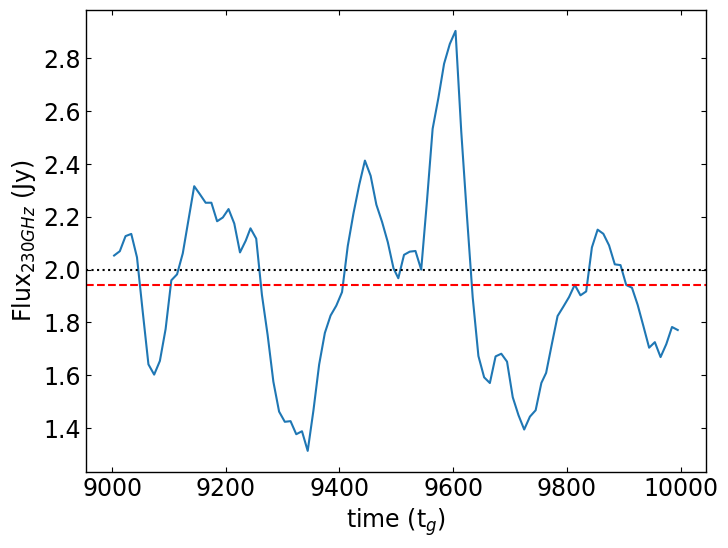

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [52]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.053368 Jy at 9003.597816
312:: 2.069852 Jy at 9013.664967
313:: 2.126924 Jy at 9023.730951
314:: 2.135337 Jy at 9033.794470
315:: 2.046487 Jy at 9043.862656
316:: 1.840915 Jy at 9053.929463
317:: 1.641085 Jy at 9063.995875
318:: 1.602205 Jy at 9074.060236
319:: 1.654050 Jy at 9084.125014
320:: 1.774743 Jy at 9094.191161
321:: 1.959548 Jy at 9104.258463
322:: 1.982198 Jy at 9114.324296
323:: 2.061460 Jy at 9124.388087
324:: 2.188961 Jy at 9134.450798
325:: 2.316020 Jy at 9144.515488
326:: 2.285287 Jy at 9154.580838
327:: 2.253338 Jy at 9164.643343
328:: 2.253481 Jy at 9174.708090
329:: 2.183208 Jy at 9184.774596
330:: 2.197511 Jy at 9194.841238
331:: 2.229482 Jy at 9204.906551
332:: 2.174641 Jy at 9214.968879
333:: 2.065167 Jy at 9225.032659
334:: 2.109470 Jy at 9235.096933
335:: 2.156461 Jy at 9243.486122
336:: 2.117420 Jy at 9253.551623
337:: 1.904164 Jy at 9263.615142
338:: 1.751828 Jy at 9273.678488
339:: 1.575297 Jy at 9283.741347
340:: 1.462111 Jy at 9293.805262
341:: 1.42